# DICOM Data Experiments

## Step 1: Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import dicom_converter 

## Step 2: Convert JPEG to DICOM

In [2]:
dicom_converter.convert_dir('data/train')

100% (460 of 460) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (2 of 3876) |                       | Elapsed Time: 0:00:00 ETA:   0:03:34

data/train/COVID19/dicom already exists
data/train/PNEUMONIA/dicom already exists
data/train/NORMAL/dicom already exists
data/train/TURBERCULOSIS/dicom already exists


 14% (565 of 3876) |###                  | Elapsed Time: 0:00:29 ETA:   0:01:56F: Error converting file: Not a JPEG file
100% (3876 of 3876) |####################| Elapsed Time: 0:14:28 Time:  0:14:28
 14% (191 of 1342) |##                   | Elapsed Time: 0:00:19 ETA:   0:01:40F: Error converting file: Not a JPEG file
100% (1342 of 1342) |####################| Elapsed Time: 0:02:12 Time:  0:02:12
100% (650 of 650) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


## Step 3: Load Some Training Data 

In [3]:
pn_dicom_dir = 'data/train/PNEUMONIA/dicom'
normal_dicom_dir = 'data/train/NORMAL/dicom'

In [4]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

(1858, 2090)
0
255


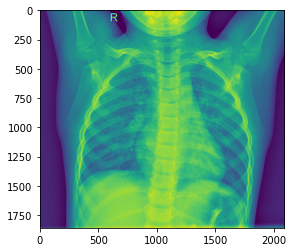

In [8]:
file = 'IM-0115-0001.dcm'
file_path = normal_dicom_dir+'/'+file
medical_image = pydicom.read_file(file_path)
image = medical_image.pixel_array
print(image.shape)
print(image.min())
print(image.max())
plt.imshow(image)
#hu_image = transform_to_hu(medical_image, image)